In [1]:
import defSim as ds
import networkx as nx
import warnings
import random
import numpy as np
import pickle

from DeffuantFunctions import RelativeAgreement, InitialExtremistInitializer
from TurnerSmaldinoFunctions import PolarizationReporter, FlacheMacyInfluence, RandomContinuousScaledInitializer


import matplotlib as mpl           # creates graphs and plots
import matplotlib.pyplot as plt    # creates graphs and plots
plt.style.use('grayscale')
import seaborn as sns              # creates graphs and plots
import pandas as pd

In [2]:
network_df = 'erdos_renyi_graph'
n_df = 400  # 400 agents
p_df = (4/400)  # for avg of 4 neighbors
focal_agent_df = ds.RandomSelector()
neighbor_selector = ds.RandomNeighborSelector()

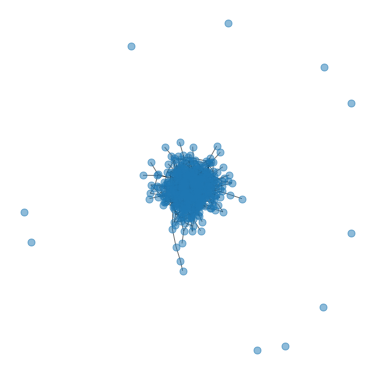

In [13]:
plt.figure(1,figsize=(5,5))
G = ds.generate_network("erdos_renyi_graph", n = n_df, p = p_df)
pos = nx.spring_layout(G)
nx.draw(G,pos=pos,node_size=50,alpha=.5)
plt.show()

<BarContainer object of 11 artists>

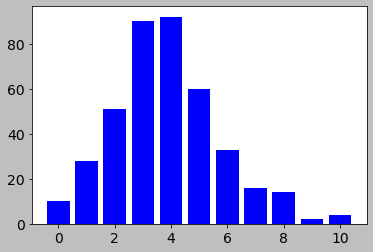

In [14]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

In [21]:
sim_def = ds.Simulation(
    topology = 'complete_graph',
    attributes_initializer = InitialExtremistInitializer(proportion_extremists = 0.1, uncertainty_extremists = 0.05, uncertainty_moderates = 0.6), 
    focal_agent_selector = focal_agent_df,
    neighbor_selector = neighbor_selector, 
    communication_regime = 'one-to-one',
    influence_function = RelativeAgreement(convergence_rate = 0.5, noise = 0.3),
    stop_condition = 'max_iteration',
    max_iterations = 30000,
    output_realizations = ['Basic', PolarizationReporter],
    tickwise = ['f01', 'uncertainty'],
    parameter_dict = {
        'n': 200,
        'p': p_df,
        'num_features': 1
    }
)
sim_def.initialize_simulation()

/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/agents_init/agents_init.py:165: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")


In [22]:
def plot_by_color(network, feature = 'f01', title = None, pos = None):
    nodes = network.nodes()
    colors = [network.nodes[n][feature] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    plt.figure(1,figsize=(10,10))
    if pos is None:
        pos = nx.circular_layout(network)
    ec = nx.draw_networkx_edges(network, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(network, pos, nodelist=nodes, node_color=colors, 
                                node_size=100, cmap=plt.cm.winter,
                                vmin=0, vmax=1)
    
    if title is not None:
        plt.title(title)
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

(array([13.,  0.,  3.,  8.,  5.,  0.,  3.,  3.,  3.,  2.,  4.,  4.,  2.,
         7.,  5.,  1.,  5.,  2.,  5.,  3.,  2.,  6.,  5.,  3.,  5.,  6.,
         3.,  1.,  2.,  7.,  0.,  2.,  3.,  2.,  8.,  2.,  1.,  6.,  3.,
         7.,  2.,  5.,  4.,  5.,  4.,  2.,  4.,  3.,  6., 13.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

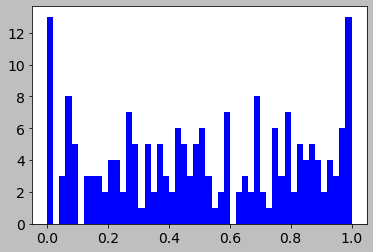

In [23]:
#plot_by_color(sim_def.network, feature = 'f01', title = 'f01')
plt.hist([sim_def.network.nodes[n]['f01'] for n in sim_def.network.nodes], bins = 50, color="b")

In [24]:
sim_def.run_simulation(initialize = False)

,Seed,Ticks,SuccessfulInfluence,Topology,n,p,num_features,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization,Tickwise_f01,Tickwise_uncertainty
0,19337,30000,30000,complete_graph,200,0.01,1,Generator(PCG64),182,2,0.05,0.588191,0.509689,0.21175,"[[0.7491307052143807, 0.5097588408702785, 0.88...","[[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,..."


In [3]:
# function now as simple as possible, but can be expanded for more complex visualization
def plot_dynamics(feature):
    plt.plot(feature)

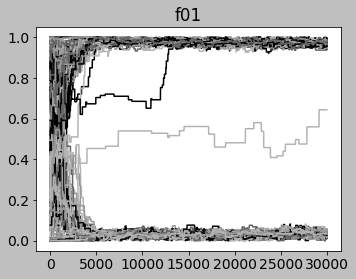

In [26]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()

plt.subplot(321, title='f01')
plot_dynamics(sim_def.return_values()['f01'][0])

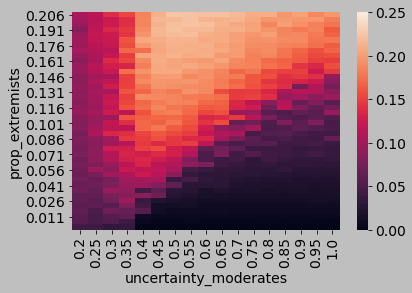

In [30]:
data = pickle.load(open('results_df.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

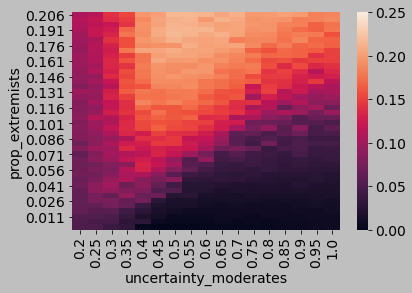

In [41]:
data = pickle.load(open('results_df_noise.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

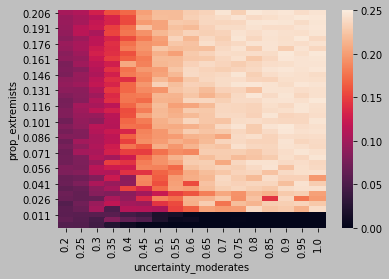

In [5]:
data = pickle.load(open('results_TEST_df.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

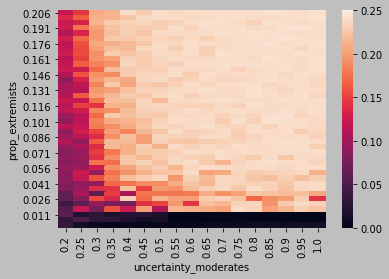

In [4]:
data = pickle.load(open('results_TEST_df_noise.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

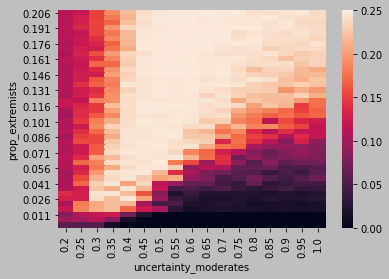

In [6]:
data = pickle.load(open('results_TEST_100agents_df.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

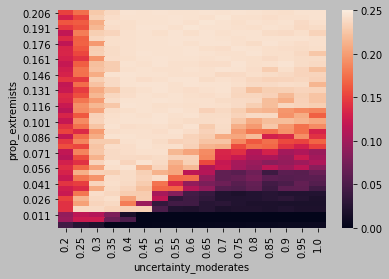

In [7]:
data = pickle.load(open('results_TEST_100agents_df_noise.pickledata', 'rb'))
data = data.groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

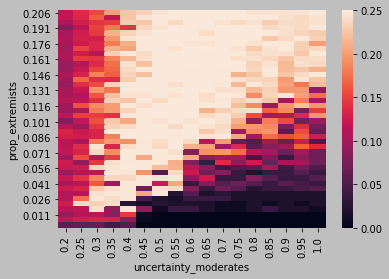

In [8]:
data = pickle.load(open('results_TEST_100agents__tsnoise_df.pickledata', 'rb'))
data = data.loc[data['noise'] == 0].groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

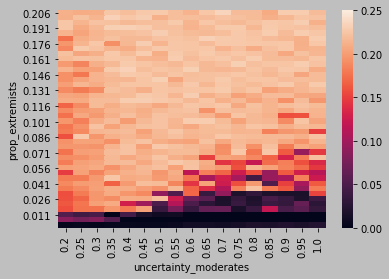

In [9]:
data = pickle.load(open('results_TEST_100agents__tsnoise_df.pickledata', 'rb'))
data = data.loc[data['noise'] == 0.1].groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

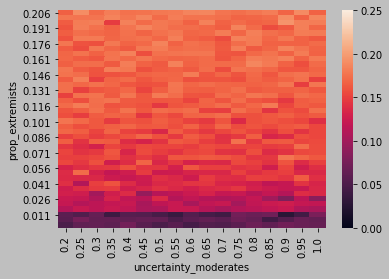

In [10]:
data = pickle.load(open('results_TEST_100agents__tsnoise_df.pickledata', 'rb'))
data = data.loc[data['noise'] == 0.2].groupby(['uncertainty_moderates', 'prop_extremists']).mean().reset_index()
data = data.pivot("prop_extremists","uncertainty_moderates", "Polarization" ).sort_values("prop_extremists", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

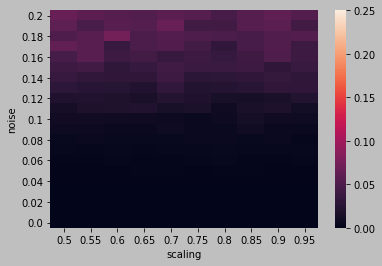

In [11]:
data = pickle.load(open('results_TEST_100agents__tsnoise_tsinit_df.pickledata', 'rb'))
data = data.groupby(['scaling', 'noise']).mean().reset_index()
data = data.pivot("noise","scaling", "Polarization" ).sort_values("noise", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

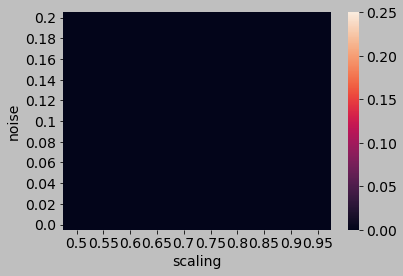

In [6]:
data = pickle.load(open('results_TEST_100agents__tsnoise_tsinit_link_df.pickledata', 'rb'))
data = data.groupby(['scaling', 'noise']).mean().reset_index()
data = data.pivot("noise","scaling", "Polarization" ).sort_values("noise", ascending = False)
ax = sns.heatmap(data, vmin = 0, vmax = 0.25)

In [35]:
data

,uncertainty_moderates,prop_extremists,index,Seed,Ticks,SuccessfulInfluence,n,p,num_features,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization
0,0.2,0.001,0,26834,10000,10000,400,0.01,1,400,1,0.0025,0.500000,0.492194,0.010427
1,0.2,0.006,0,58154,10000,10000,400,0.01,1,400,2,0.0025,0.504987,0.498741,0.012802
2,0.2,0.011,0,78277,10000,10000,400,0.01,1,398,2,0.0050,0.509912,0.506588,0.014747
3,0.2,0.016,0,96423,10000,10000,400,0.01,1,396,2,0.0075,0.514774,0.491841,0.016147
4,0.2,0.021,0,31155,10000,10000,400,0.01,1,394,2,0.0100,0.519574,0.496028,0.017348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1.0,0.186,0,89482,10000,10000,400,0.01,1,328,2,0.0925,0.642807,0.573618,0.045290
710,1.0,0.191,0,18963,10000,10000,400,0.01,1,326,2,0.0950,0.645476,0.428536,0.045364
711,1.0,0.196,0,97518,10000,10000,400,0.01,1,324,2,0.0975,0.648083,0.418028,0.046766
712,1.0,0.201,0,11826,10000,10000,400,0.01,1,322,2,0.1000,0.650627,0.589435,0.049369


In [4]:
sim_df_test = sim = ds.Simulation(
                    topology = 'complete_graph',
                    attributes_initializer = RandomContinuousScaledInitializer(num_features = 1, uncertainty_moderates = 0.6, scaling_factor = 0.5), 
                    focal_agent_selector = focal_agent_df,
                    neighbor_selector = neighbor_selector, 
                    communication_regime = 'one-to-one',
                    influence_function = RelativeAgreement(modifiers = ['ts_noise', 'link_uncertainty'], convergence_rate = 0.3, noise = 0.2),
                    stop_condition = 'max_iteration',
                    max_iterations = 10000,
                    output_realizations = ['Basic', PolarizationReporter],
                    tickwise = ['f01'],
                    parameter_dict = {
                        'n': 100,
                        'num_features': 1,
                        'scaling': 1,
                        'noise': 0.2,
                        'uncertainty_moderates': 0.6,
                        'output_step_size': 100
                    }
                )
sim_df_test.run_simulation()

/home/dieko/VENVs/defSim_release/lib/python3.8/site-packages/defSim/agents_init/agents_init.py:165: UserWarning: No Numpy Generator in parameter dictionary, creating default
  warnings.warn("No Numpy Generator in parameter dictionary, creating default")


,Seed,Ticks,SuccessfulInfluence,Topology,n,num_features,scaling,noise,uncertainty_moderates,output_step_size,np_random_generator,Regions,Zones,Homogeneity,AverageDistance,AverageOpinionf01,Polarization,Tickwise_f01
0,58005,10000,10000,complete_graph,100,1,1,0.2,0.6,100,Generator(PCG64),100,1,0.01,0.5,0.438583,0.044309,"[[0.43554093679458245, 0.7330439707957336, 0.4..."


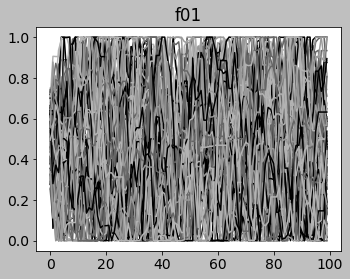

In [5]:
font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
plt.rc('font', **font)
plt.figure(figsize=[12,14])
plt.tight_layout()

plt.subplot(321, title='f01')
plot_dynamics(sim_df_test.return_values()['f01'][0])

In [13]:
[sim_df_test.network.nodes[i]['uncertainty'] for i in sim_df_test.network.nodes]

[0.000557220823311888,
 0.0018588406187171058,
 0.006524838651321368,
 0.0009184992959834215,
 0.009154188115267152,
 0.0010505548047323732,
 0.004503422562011631,
 0.007779152693653559,
 0.00491404687831974,
 0.004202944495572146,
 0.005508256780516183,
 0.004949204113966672,
 0.0050904440886094075,
 0.0049578356669255415,
 0.003989080027873493,
 0.004525953437574547,
 0.0038294234188164245,
 0.006898187929196541,
 0.010672199827058606,
 0.00475206284797096,
 0.0005055412159661321,
 0.0014887783036443558,
 0.0059539716310276145,
 0.0003674543425611354,
 0.00192760281515314,
 0.008104645430006416,
 0.00538981986289346,
 0.002454781517522986,
 0.0019193145879565776,
 0.001313160433315197,
 0.005858118879572759,
 0.004843487415086849,
 0.0022704523837813184,
 0.00389189862996675,
 0.006714523276247788,
 0.008305054260047988,
 0.004111024647959089,
 0.0050967747211995065,
 0.004872963039833061,
 0.008750390020166532,
 0.0072730362217573894,
 0.004057744493818382,
 0.0076591386274321065,
 